In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [19]:
# Definir rutas de las carpetas que contienen las imágenes
directorio = "../../../imagenes/mexh/"
img_width, img_height = 250, 250
input_shape = (img_width, img_height, 3)

In [20]:
# Hiperparámetros
epochs = 20
batch_size = 62

In [21]:
# Configurar el generador de datos de imágenes
generador_datos = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Cargar y dividir los datos en conjuntos de entrenamiento y prueba
generador_entrenamiento = generador_datos.flow_from_directory(
    directorio,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

generador_prueba = generador_datos.flow_from_directory(
    directorio,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 3200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [22]:
# Cargar el modelo ResNet50 pre-entrenado sin la parte superior (include_top = False)
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Congelar las capas de la ResNet50 pre-entrenada
for layer in resnet_model.layers:
    layer.trainable = False

In [23]:
# Construir el modelo
model = Sequential()
model.add(resnet_model)
model.add(Flatten())
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [24]:
# Entrenar el modelo
historia = model.fit(
    generador_entrenamiento,
    steps_per_epoch=generador_entrenamiento.samples // batch_size,
    epochs=epochs,
    validation_data=generador_prueba,
    validation_steps=generador_prueba.samples // batch_size
)

Epoch 1/20
51/51 [==============================] - 19s 336ms/step - loss: 0.6946 - accuracy: 0.4927 - val_loss: 0.6931 - val_accuracy: 0.5054
Epoch 2/20
51/51 [==============================] - 16s 323ms/step - loss: 0.6932 - accuracy: 0.5019 - val_loss: 0.6931 - val_accuracy: 0.4987
Epoch 3/20
51/51 [==============================] - 17s 323ms/step - loss: 0.6932 - accuracy: 0.4927 - val_loss: 0.6932 - val_accuracy: 0.4960
Epoch 4/20
51/51 [==============================] - 17s 323ms/step - loss: 0.6932 - accuracy: 0.4822 - val_loss: 0.6931 - val_accuracy: 0.4946
Epoch 5/20
51/51 [==============================] - 17s 323ms/step - loss: 0.6932 - accuracy: 0.4971 - val_loss: 0.6932 - val_accuracy: 0.4960
Epoch 6/20
51/51 [==============================] - 17s 324ms/step - loss: 0.6932 - accuracy: 0.4933 - val_loss: 0.6931 - val_accuracy: 0.5067
Epoch 7/20
51/51 [==============================] - 17s 324ms/step - loss: 0.6932 - accuracy: 0.4911 - val_loss: 0.6931 - val_accuracy: 0.5000

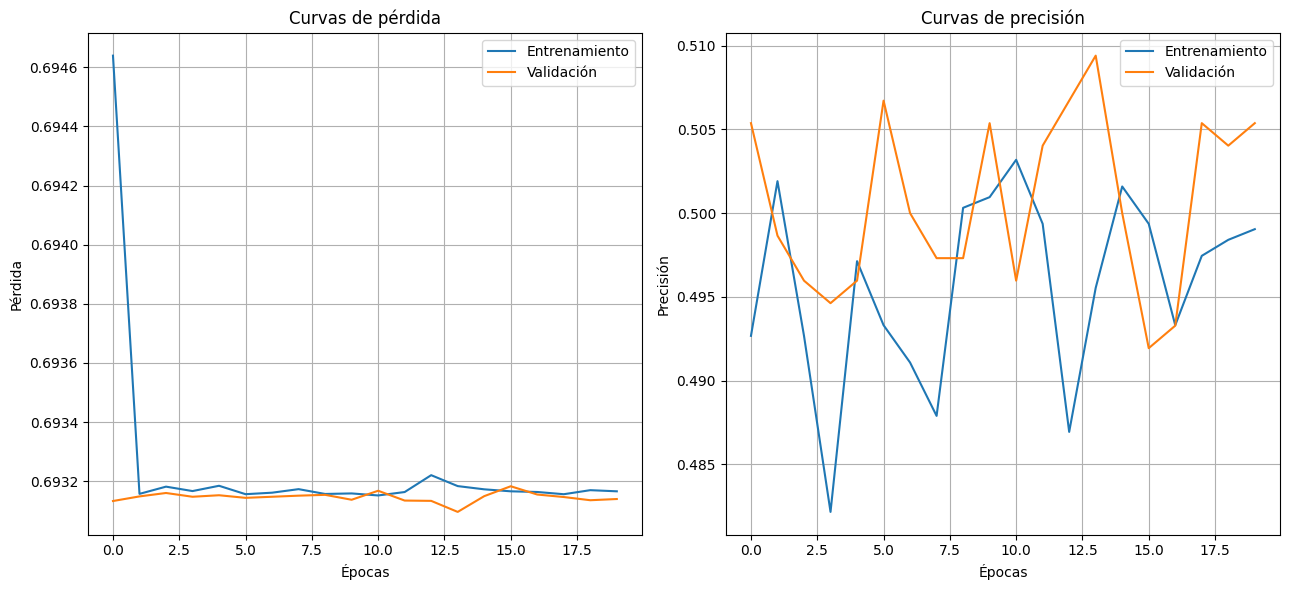

In [32]:
# Curvas de pérdida
plt.figure(figsize=(13,6))
plt.subplot(1, 2, 1)
plt.plot(historia.history['loss'], label='Entrenamiento')
plt.plot(historia.history['val_loss'], label='Validación')
plt.title('Curvas de pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid()

# Curvas de precisión
plt.subplot(1, 2, 2)
plt.plot(historia.history['accuracy'], label='Entrenamiento')
plt.plot(historia.history['val_accuracy'], label='Validación')
plt.title('Curvas de precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()